In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
from google.colab import files
uploaded = files.upload()

Saving crypto_market_data.csv to crypto_market_data (1).csv


In [7]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [ ]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

In [10]:
from copy import copy
# Create a DataFrame with the scaled data
df_market_data = pd.DataFrame(
    scaled_data,
    columns=market_data_df.columns
)

# Copy the crypto names from the original data
copy_crypto_names = market_data_df.index

# Set the coinid column as index
coinid = [x for x in copy_crypto_names]
df_market_data.index = coinid

# Display sample data
display(df_market_data.head(10))
display(df_market_data.tail(10))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351
bitcoin-cash-sv,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
ethereum-classic,-0.071312,-0.229484,-0.175544,0.051882,-0.551760,-0.526060,-0.273062
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625
maker,-0.125168,0.580730,-0.202356,0.582911,-0.395923,-0.358240,-0.273433
havven,-1.428574,-0.025510,-1.628859,-0.860354,-0.840714,0.898815,0.268647
omisego,1.919812,0.370447,-1.619761,-0.409716,1.696480,0.811207,-0.021888
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488
ontology,-0.409044,-0.906963,-1.298986,-1.393153,-0.696937,-0.422835,-0.292344
ftx-token,0.414711,0.414044,-0.047386,-0.465380,0.128185,-0.416502,-0.145469
true-usd,0.078038,-0.687745,-0.009191,-0.058214,0.007388,-0.550441,-0.281747
digibyte,1.217453,-0.607714,-0.907066,0.449939,-0.662530,0.572367,-0.132482


### Find the Best Value for k Using the Original Scaled DataFrame.

In [15]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_means = [x for x in range(1, 11)]

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_means:
  KMeans_model = KMeans(n_clusters=k, random_state=0)
  KMeans_model.fit(df_market_data)
  inertia.append(KMeans_model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
dict_elbow = {
    "k": k_means,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_market_data_elbow = pd.DataFrame(dict_elbow)

# Display the DataFrame
display(df_market_data_elbow)

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


Text(0, 0.5, 'Inertia')

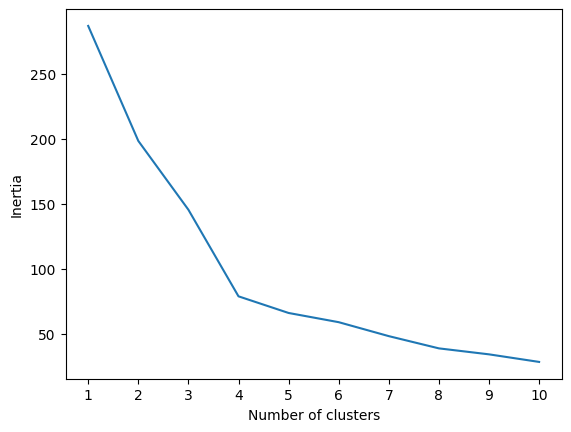

In [16]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.plot(df_market_data_elbow["k"], df_market_data_elbow["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")


#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:**
Inertia around 75 and the number of clusters at 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [17]:
# Initialize the K-Means model using the best value for k
KMeans_model = KMeans(n_clusters=4, random_state=0)

In [18]:
# Fit the K-Means model using the scaled data
model = KMeans_model.fit(df_market_data)

In [19]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = KMeans_model.predict(df_market_data)

# View the resulting array of cluster values.
display(predictions)

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [20]:
# Create a copy of the DataFrame
copy_df_market_data = df_market_data.copy()

In [21]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data["cluster"] = model.labels_

# Display sample data
display(df_market_data.head(10))
display(df_market_data.tail(10))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2
bitcoin-cash-sv,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029,0


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
ethereum-classic,-0.071312,-0.229484,-0.175544,0.051882,-0.551760,-0.526060,-0.273062,0
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625,1
maker,-0.125168,0.580730,-0.202356,0.582911,-0.395923,-0.358240,-0.273433,2
havven,-1.428574,-0.025510,-1.628859,-0.860354,-0.840714,0.898815,0.268647,0
omisego,1.919812,0.370447,-1.619761,-0.409716,1.696480,0.811207,-0.021888,0
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488,3
ontology,-0.409044,-0.906963,-1.298986,-1.393153,-0.696937,-0.422835,-0.292344,0
ftx-token,0.414711,0.414044,-0.047386,-0.465380,0.128185,-0.416502,-0.145469,0
true-usd,0.078038,-0.687745,-0.009191,-0.058214,0.007388,-0.550441,-0.281747,0
digibyte,1.217453,-0.607714,-0.907066,0.449939,-0.662530,0.572367,-0.132482,0


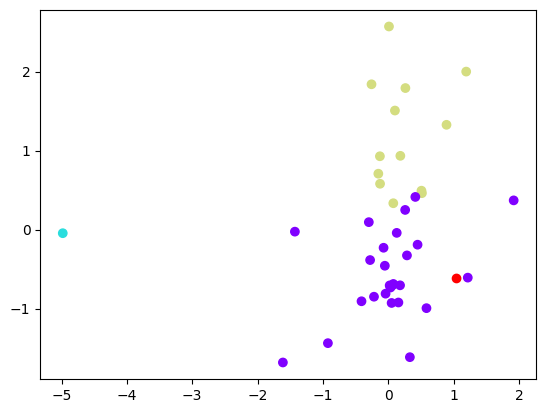

In [26]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

import matplotlib.pyplot as plt

plt.scatter(x=df_market_data["price_change_percentage_24h"], y=df_market_data["price_change_percentage_7d"], c=df_market_data["cluster"], cmap="rainbow")




### Optimize Clusters with Principal Component Analysis.

In [27]:
# Create a PCA model instance and set `n_components=3`.
model_pca = PCA(n_components=3)

In [28]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
model_pca_data = model_pca.fit_transform(df_market_data)

# View the first five rows of the DataFrame.
display(model_pca_data[:5])

array([[ 1.19408229, -0.90207402,  0.58533763],
       [ 1.00970605, -0.66358438,  1.13695032],
       [-0.72253591, -0.30763241, -0.7218133 ],
       [-0.74826646, -0.33237895, -0.55847869],
       [ 2.25853853, -1.82696614,  1.37816649]])

In [29]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
variance = model_pca.explained_variance_ratio_
print(variance)



[0.37269822 0.32489961 0.18917649]


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**
Using only the first three digits to the right of the decimal point, the total variance would be 0.885. I could also calculate the variance using the code:

variance = model_pca.explained_variance_ratio_total_explained_variance = sum(variance)
print(total_explained_variance). I instered that piece of code.

Using this piece of code, I came up with 0.886.

In [45]:
variance = model_pca.explained_variance_ratio_
total_explained_variance = sum(variance)
print(total_explained_variance)

0.8867743104975923


In [30]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(
    data=model_pca_data,
    columns=["principal component 1", "principal component 2", "principal component 3"]
)

# Copy the crypto names from the original data
copy_crypto_names = market_data_df.index

# Set the coinid column as index
coinid = [x for x in copy_crypto_names]
df_market_data_pca.index = coinid

# Display sample data
display(df_market_data_pca.head(10))
display(df_market_data_pca.tail(10))

,principal component 1,principal component 2,principal component 3
bitcoin,1.194082,-0.902074,0.585338
ethereum,1.009706,-0.663584,1.136950
tether,-0.722536,-0.307632,-0.721813
ripple,-0.748266,-0.332379,-0.558479
bitcoin-cash,2.258539,-1.826966,1.378166
binancecoin,1.719188,-0.993613,0.663561
chainlink,1.396401,-0.721542,2.731341
cardano,1.359187,-0.651114,1.482162
litecoin,0.869062,-0.828724,0.856779
bitcoin-cash-sv,-0.763186,-0.619275,-0.315895


,principal component 1,principal component 2,principal component 3
ethereum-classic,-0.820641,-0.404693,-0.185554
ethlend,-0.321451,8.800190,2.894631
maker,0.694440,-0.496058,0.759548
havven,-1.884981,1.533159,0.749783
omisego,-0.177649,0.045948,-1.457832
celsius-degree-token,7.610759,2.465053,-3.719577
ontology,-2.361075,0.084567,0.000994
ftx-token,-0.464345,-0.538034,-0.054965
true-usd,-0.702148,-0.341378,-0.726295
digibyte,-0.736439,-0.167072,-0.929537


### Find the Best Value for k Using the PCA Data

In [32]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_means = [x for x in range(1, 11)]

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_means:
  KMeans_model = KMeans(n_clusters=k, random_state=0)
  KMeans_model.fit(df_market_data_pca)
  inertia.append(KMeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
dict_elbow = {
    "k": k_means,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame
display(df_market_data_elbow)

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


Text(0, 0.5, 'Inertia')

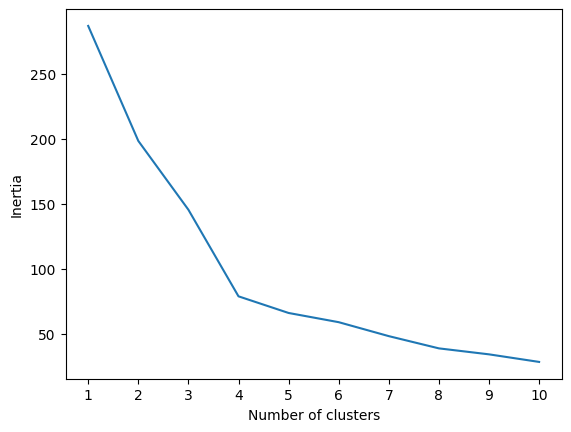

In [33]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.plot(df_market_data_elbow["k"], df_market_data_elbow["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")


#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
  Inertia around 75 and the number of clusters at 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**
  No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k
KMeans_model = KMeans(n_clusters=4, random_state=0)

In [ ]:
# Fit the K-Means model using the PCA data
KMeans_model.fit(df_market_data_pca)

In [34]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions = KMeans_model.predict(df_market_data_pca)

# Print the resulting array of cluster values.
print(predictions)

[7 1 4 4 7 7 1 1 1 9 0 4 9 7 9 1 0 9 1 4 0 7 0 9 4 4 9 5 1 6 9 9 2 1 8 4 3
 5 9 4 4]


In [35]:
# Create a copy of the DataFrame with the PCA data
copy_df_market_data_pca = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data_pca["cluster"] = model.labels_

# Display sample data
display(df_market_data_pca.head(10))
display(df_market_data_pca.tail(10))

,principal component 1,principal component 2,principal component 3,cluster
bitcoin,1.194082,-0.902074,0.585338,2
ethereum,1.009706,-0.663584,1.136950,2
tether,-0.722536,-0.307632,-0.721813,0
ripple,-0.748266,-0.332379,-0.558479,0
bitcoin-cash,2.258539,-1.826966,1.378166,2
binancecoin,1.719188,-0.993613,0.663561,2
chainlink,1.396401,-0.721542,2.731341,2
cardano,1.359187,-0.651114,1.482162,2
litecoin,0.869062,-0.828724,0.856779,2
bitcoin-cash-sv,-0.763186,-0.619275,-0.315895,0


,principal component 1,principal component 2,principal component 3,cluster
ethereum-classic,-0.820641,-0.404693,-0.185554,0
ethlend,-0.321451,8.800190,2.894631,1
maker,0.694440,-0.496058,0.759548,2
havven,-1.884981,1.533159,0.749783,0
omisego,-0.177649,0.045948,-1.457832,0
celsius-degree-token,7.610759,2.465053,-3.719577,3
ontology,-2.361075,0.084567,0.000994,0
ftx-token,-0.464345,-0.538034,-0.054965,0
true-usd,-0.702148,-0.341378,-0.726295,0
digibyte,-0.736439,-0.167072,-0.929537,0


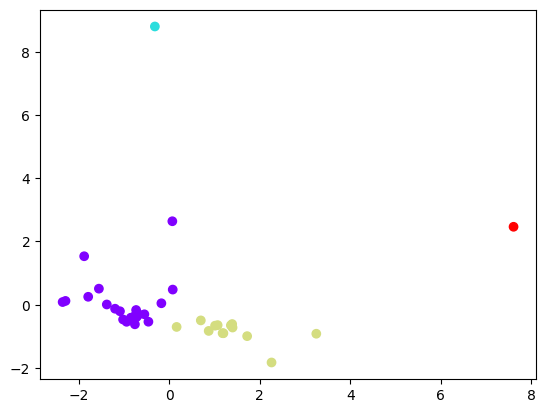

In [36]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
import plotly.express as px
from matplotlib import pyplot as plt
scatter = px.scatter(df_market_data_pca, x="principal component 1", y="principal component 2", color="cluster")
scatter.show()

plt.scatter(x=df_market_data_pca["principal component 1"], y=df_market_data_pca["principal component 2"], c=df_market_data_pca["cluster"], cmap="rainbow")

### Determine the Weights of Each Feature on each Principal Component

In [47]:
from operator import index
# Use the columns from the original scaled DataFrame as the index.
index = df_market_data.columns

if df_market_data.shape[0] == len(index):
  df_market_data.index = index

# Display sample data
display(df_market_data.head())


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:**
    The 7 day percent change seems to have the greatest variance.  